# 14장 모델의 성능 향상시키기

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/ch14-colab.ipynb)

## 데이터의 확인과 검증셋

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 데이터를 미리 보겠습니다.
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [111]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [112]:
#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
# 80대 20으로 나눠진 것에서 80% 쪽에서 25% 또 떼어내서 검증셋 설정
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 30)                390       
                                                                 
 dense_118 (Dense)           (None, 12)                372       
                                                                 
 dense_119 (Dense)           (None, 8)                 104       
                                                                 
 dense_120 (Dense)           (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 0s 15ms/step - loss: 6.5580 - accuracy: 0.2528 - val_loss: 3.5861 - val_accuracy: 0.2285
Epoch 2/50
8/8 [==============================] 

In [113]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 802us/step - loss: 0.1554 - accuracy: 0.9531
Test accuracy: 0.9530768990516663


## 2. 모델 업데이트하기

### 기본 코드 불러오기

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터를 입력합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_121 (Dense)           (None, 30)                390       
                                                                 
 dense_122 (Dense)           (None, 12)                372       
                                                                 
 dense_123 (Dense)           (None, 8)                 104       
                                                                 
 dense_124 (Dense)           (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


### 모델의 저장 설정 및 실행

In [115]:
# 모델 저장의 조건을 설정합니다.
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다. 
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])

# 에포크가 진행됨에 따라서 설정된 폴더 안에 설정된 파일로 저장이 된다.


Epoch 1: saving model to ./data/model/all/01-0.7538.hdf5

Epoch 2: saving model to ./data/model/all/02-0.7538.hdf5

Epoch 3: saving model to ./data/model/all/03-0.7454.hdf5

Epoch 4: saving model to ./data/model/all/04-0.7623.hdf5

Epoch 5: saving model to ./data/model/all/05-0.8000.hdf5

Epoch 6: saving model to ./data/model/all/06-0.8477.hdf5

Epoch 7: saving model to ./data/model/all/07-0.8677.hdf5

Epoch 8: saving model to ./data/model/all/08-0.8908.hdf5

Epoch 9: saving model to ./data/model/all/09-0.9023.hdf5

Epoch 10: saving model to ./data/model/all/10-0.9169.hdf5

Epoch 11: saving model to ./data/model/all/11-0.9262.hdf5

Epoch 12: saving model to ./data/model/all/12-0.9300.hdf5

Epoch 13: saving model to ./data/model/all/13-0.9323.hdf5

Epoch 14: saving model to ./data/model/all/14-0.9315.hdf5

Epoch 15: saving model to ./data/model/all/15-0.9315.hdf5

Epoch 16: saving model to ./data/model/all/16-0.9315.hdf5

Epoch 17: saving model to ./data/model/all/17-0.9346.hdf5

Epoch

In [116]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 795us/step - loss: 0.1144 - accuracy: 0.9669
Test accuracy: 0.9669230580329895


## 3. 그래프로 과적합 확인하기

In [117]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라 시간이 다소 걸릴수 있습니다)
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

In [118]:
# history에 저장된 학습 결과를 확인해 보겠습니다. 
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.140837,0.945856,0.134746,0.956923
1,0.137930,0.948678,0.135519,0.953846
2,0.138421,0.945599,0.133190,0.956923
3,0.135970,0.947395,0.132998,0.956923
4,0.135558,0.948935,0.132034,0.955385
...,...,...,...,...
1995,0.038308,0.991275,0.056295,0.986923
1996,0.038247,0.990249,0.054958,0.987692
1997,0.037534,0.990506,0.055291,0.987692
1998,0.037790,0.990249,0.059731,0.985385


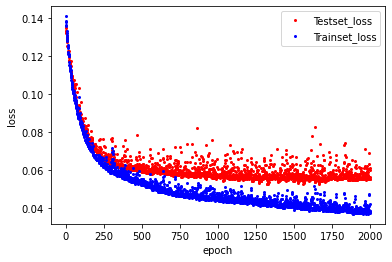

In [119]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 4. 학습의 자동 중단

### 기본 코드 불러오기

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_125 (Dense)           (None, 30)                390       
                                                                 
 dense_126 (Dense)           (None, 12)                372       
                                                                 
 dense_127 (Dense)           (None, 8)                 104       
                                                                 
 dense_128 (Dense)           (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


### 학습의 자동 중단 및 최적화 모델 저장

In [121]:
# 학습이 언제 자동 중단 될지를 설정합니다.
# 20번 이상 더이상 오차가 작아지지 않으면 학습을 멈춰라
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
# 마지막 모델 하나만 저장해라
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])


Epoch 1/2000
8/8 [==============================] - 0s 16ms/step - loss: 2.0025 - accuracy: 0.5525 - val_loss: 1.0078 - val_accuracy: 0.7846
Epoch 2/2000
8/8 [==============================] - 0s 3ms/step - loss: 1.2138 - accuracy: 0.7626 - val_loss: 1.0970 - val_accuracy: 0.7938
Epoch 3/2000
8/8 [==============================] - 0s 5ms/step - loss: 1.0153 - accuracy: 0.7816 - val_loss: 0.6459 - val_accuracy: 0.8269
Epoch 4/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.4967 - accuracy: 0.8355 - val_loss: 0.4343 - val_accuracy: 0.7969
Epoch 5/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.4175 - accuracy: 0.7965 - val_loss: 0.3219 - val_accuracy: 0.8854
Epoch 6/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.3272 - accuracy: 0.8814 - val_loss: 0.3170 - val_accuracy: 0.8985
Epoch 7/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.2971 - accuracy: 0.8909 - val_loss: 0.2945 - val_accuracy: 0.8854
Epoch 8/2000
8/8 [=

In [122]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 815us/step - loss: 0.0601 - accuracy: 0.9792
Test accuracy: 0.9792307615280151
